# Customer Sales Data Analysis
Prepared by **M. Suheli**

This notebook loads `sales_data.csv`, performs cleaning, exploratory data analysis, KPI calculations and creates plots.

In [2]:
import pandas as pd
df = pd.read_csv("sales_data.csv", parse_dates=['OrderDate'])
df.head()

,OrderID,OrderDate,Region,State,Product,Quantity,UnitPrice_INR,DiscountPct,Revenue_INR,CustomerSegment
0,ORD100000,2024-10-20,South,Karnataka,Smartphone,1,18284,5,17369.8,Retail
1,ORD100001,2024-02-20,West,Maharashtra,Headphones,1,1274,0,1274.0,Retail
2,ORD100002,2024-09-20,West,Maharashtra,Smartphone,1,34464,0,34464.0,Retail
3,ORD100003,2024-09-26,West,Gujarat,Shoes,1,5498,10,4948.2,Wholesale
4,ORD100004,2024-06-05,South,Tamil Nadu,Smartphone,1,29823,0,29823.0,Online


In [3]:
# Basic checks and cleaning
print("Rows:", len(df))
print(df.info())
# Ensure revenue numeric
df['Revenue_INR'] = pd.to_numeric(df['Revenue_INR'], errors='coerce').fillna(0)
# Add Month column
df['Month'] = df['OrderDate'].dt.to_period('M').astype(str)
df.describe(include='all')

Rows: 400
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   OrderID          400 non-null    object        
 1   OrderDate        400 non-null    datetime64[ns]
 2   Region           400 non-null    object        
 3   State            400 non-null    object        
 4   Product          400 non-null    object        
 5   Quantity         400 non-null    int64         
 6   UnitPrice_INR    400 non-null    int64         
 7   DiscountPct      400 non-null    int64         
 8   Revenue_INR      400 non-null    float64       
 9   CustomerSegment  400 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 31.4+ KB
None


,OrderID,OrderDate,Region,State,Product,Quantity,UnitPrice_INR,DiscountPct,Revenue_INR,CustomerSegment,Month
count,400,400,400,400,400,400.000000,400.000000,400.000000,400.000000,400,400
unique,400,NaN,4,12,8,NaN,NaN,NaN,NaN,3,12
top,ORD100000,NaN,West,Maharashtra,Smartphone,NaN,NaN,NaN,NaN,Retail,2024-08
freq,1,NaN,123,48,77,NaN,NaN,NaN,NaN,290,39
mean,NaN,2024-06-23 10:44:23.999999744,NaN,NaN,NaN,1.242500,6501.200000,3.012500,7952.041625,NaN,NaN
min,NaN,2024-01-01 00:00:00,NaN,NaN,NaN,1.000000,302.000000,0.000000,392.000000,NaN,NaN
25%,NaN,2024-03-19 12:00:00,NaN,NaN,NaN,1.000000,1789.750000,0.000000,1898.750000,NaN,NaN
50%,NaN,2024-06-26 12:00:00,NaN,NaN,NaN,1.000000,3251.000000,0.000000,3390.000000,NaN,NaN
75%,NaN,2024-09-16 18:00:00,NaN,NaN,NaN,1.000000,5697.250000,5.000000,6675.250000,NaN,NaN
max,NaN,2024-12-28 00:00:00,NaN,NaN,NaN,4.000000,34586.000000,15.000000,117252.000000,NaN,NaN


In [4]:
# KPI calculations
total_sales = df['Revenue_INR'].sum()
total_orders = df['OrderID'].nunique()
total_qty = df['Quantity'].sum()
avg_order_value = total_sales / total_orders
print(f"Total Sales (INR): {total_sales:.2f}")
print(f"Total Orders: {total_orders}")
print(f"Total Quantity Sold: {total_qty}")
print(f"Average Order Value (INR): {avg_order_value:.2f}")

Total Sales (INR): 3180816.65
Total Orders: 400
Total Quantity Sold: 497
Average Order Value (INR): 7952.04


In [5]:
sales_by_region = df.groupby('Region', as_index=False)['Revenue_INR'].sum().sort_values('Revenue_INR', ascending=False)
top_products = df.groupby('Product', as_index=False)['Revenue_INR'].sum().sort_values('Revenue_INR', ascending=False).head(10)
monthly_sales = df.groupby('Month', as_index=False)['Revenue_INR'].sum().sort_values('Month')

from IPython.display import display

display(sales_by_region)
display(top_products)
display(monthly_sales)



,Region,Revenue_INR
2,South,1020718.00
3,West,965098.85
1,North,628361.30
0,East,566638.50


,Product,Revenue_INR
5,Smartphone,2036275.95
4,Shoes,324825.95
2,Jacket,300481.85
1,Headphones,169507.45
7,Wristwatch,138859.65
0,Backpack,109648.30
3,Laptop Sleeve,50677.90
6,Sunglasses,50539.60


,Month,Revenue_INR
0,2024-01,235539.25
1,2024-02,199863.40
2,2024-03,274090.35
3,2024-04,239996.10
4,2024-05,269905.50
5,2024-06,212677.00
6,2024-07,519215.00
7,2024-08,272458.95
8,2024-09,284095.60
9,2024-10,252310.20


Loaded data from CSV file.

--- Revenue by Region ---


,Region,Revenue_INR
2,South,1020718.00
3,West,965098.85
1,North,628361.30
0,East,566638.50



--- Top Products by Revenue ---


,Product,Revenue_INR
5,Smartphone,2036275.95
4,Shoes,324825.95
2,Jacket,300481.85
1,Headphones,169507.45
7,Wristwatch,138859.65
0,Backpack,109648.30
3,Laptop Sleeve,50677.90
6,Sunglasses,50539.60



--- Monthly Sales Trend ---


,Month,Revenue_INR
0,1,235539.25
1,2,199863.40
2,3,274090.35
3,4,239996.10
4,5,269905.50
5,6,212677.00
6,7,519215.00
7,8,272458.95
8,9,284095.60
9,10,252310.20



--- Revenue by Customer Segment ---


,CustomerSegment,Revenue_INR
1,Retail,2185276.00
0,Online,733281.85
2,Wholesale,262258.80



Revenue from Discounted Orders: INR 1,134,512.65
Revenue from Non-Discounted Orders: INR 2,046,304.00

--- Top 5 Discounted Products ---


Product
Smartphone       8.064516
Wristwatch       7.750000
Jacket           7.500000
Shoes            7.500000
Laptop Sleeve    7.333333
Name: DiscountPct, dtype: float64


--- Top Product per State ---


State
Bihar          Smartphone
Delhi          Smartphone
Gujarat        Smartphone
Haryana        Smartphone
Karnataka      Smartphone
Kerala         Smartphone
Maharashtra    Smartphone
Odisha         Smartphone
Punjab         Smartphone
Rajasthan      Smartphone
Tamil Nadu     Smartphone
West Bengal    Smartphone
dtype: object

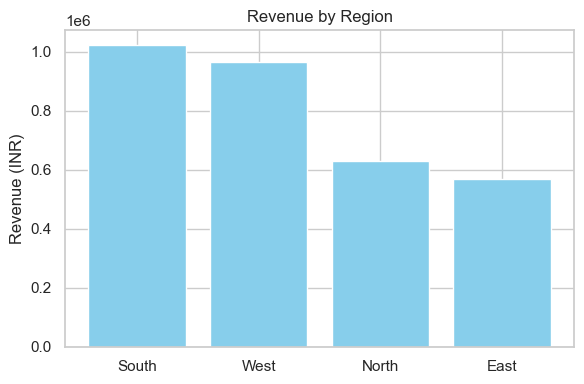

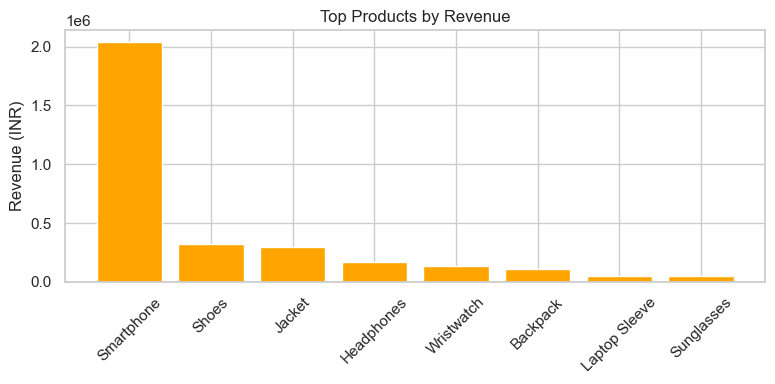

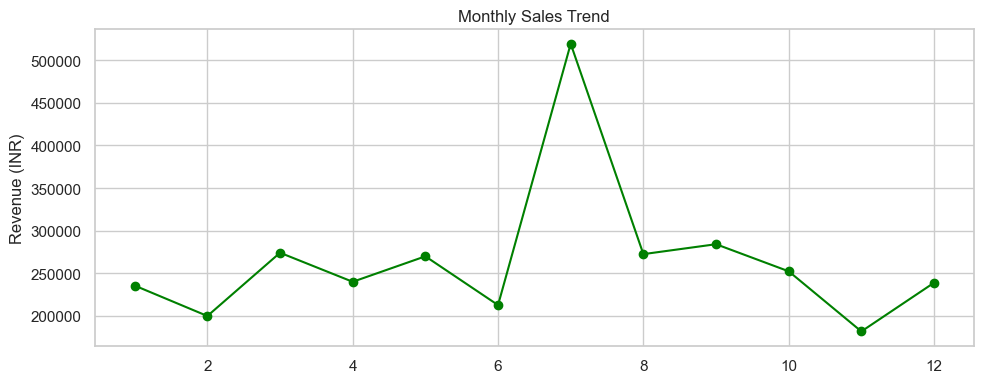

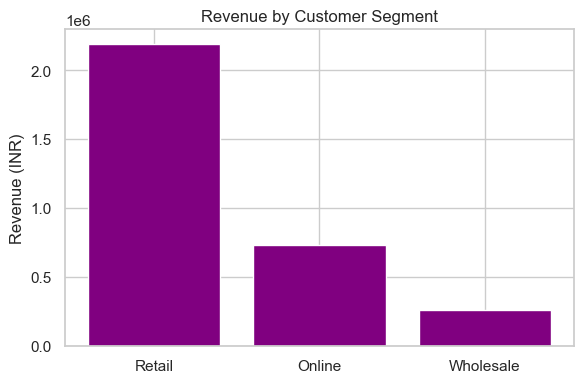

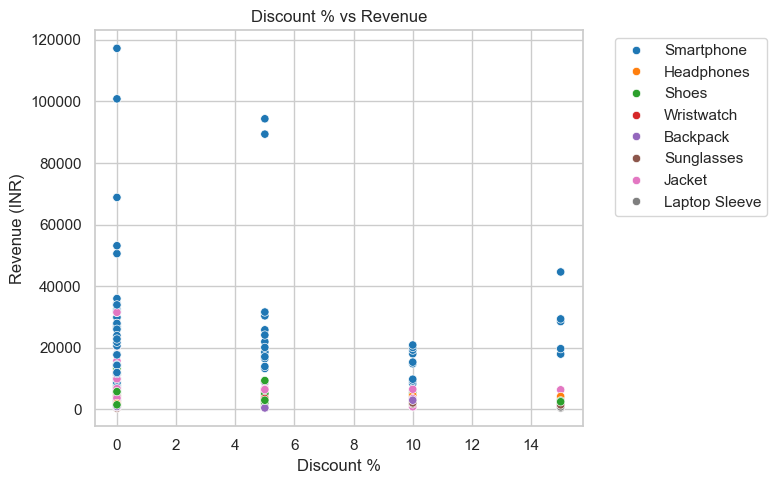

<Figure size 1200x500 with 0 Axes>

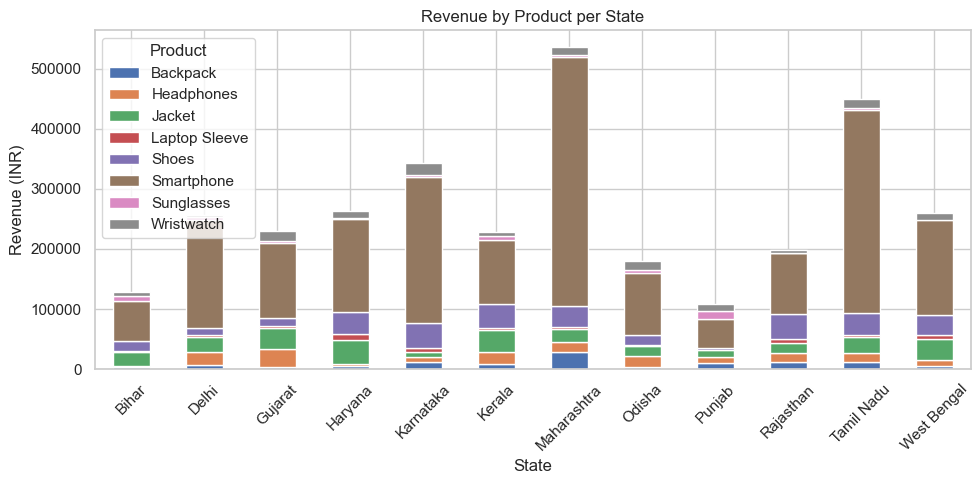

In [7]:
# ---------------- IMPORT LIBRARIES ----------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Display charts inline
%matplotlib inline
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,5)

# ---------------- LOAD CSV DATA ----------------
try:
    df = pd.read_csv(r'C:\Users\Suhel\OneDrive\Desktop\HTML SUHELI\fractal_sales_project\sales_data.csv')
    print("Loaded data from CSV file.")
except FileNotFoundError:
    raise FileNotFoundError("CSV file not found. Check the path!")

# ---------------- CLEAN COLUMN NAMES ----------------
df.columns = df.columns.str.strip()  # remove extra spaces
df['OrderDate'] = pd.to_datetime(df['OrderDate'], errors='coerce')
df['Month'] = df['OrderDate'].dt.month

# ---------------- AGGREGATIONS ----------------
# Revenue by Region
sales_by_region = df.groupby('Region', as_index=False)['Revenue_INR'] \
                    .sum().sort_values('Revenue_INR', ascending=False)

# Top Products by Revenue
top_products = df.groupby('Product', as_index=False)['Revenue_INR'] \
                 .sum().sort_values('Revenue_INR', ascending=False).head(10)

# Monthly Sales Trend
monthly_sales = df.groupby('Month', as_index=False)['Revenue_INR'] \
                  .sum().sort_values('Month')

# Customer Segment Analysis
segment_revenue = df.groupby('CustomerSegment', as_index=False)['Revenue_INR'] \
                    .sum().sort_values('Revenue_INR', ascending=False)

# Discount Analysis
discounted_revenue = df[df['DiscountPct'] > 0]['Revenue_INR'].sum()
non_discounted_revenue = df[df['DiscountPct'] == 0]['Revenue_INR'].sum()
top_discounted_products = df[df['DiscountPct'] > 0].groupby('Product')['DiscountPct'] \
                             .mean().sort_values(ascending=False).head(5)

# State-Product Insights
state_product = df.groupby(['State', 'Product'])['Revenue_INR'].sum().unstack().fillna(0)
top_product_per_state = state_product.idxmax(axis=1)

# ---------------- DISPLAY TABLES ----------------
print("\n--- Revenue by Region ---")
display(sales_by_region)

print("\n--- Top Products by Revenue ---")
display(top_products)

print("\n--- Monthly Sales Trend ---")
display(monthly_sales)

print("\n--- Revenue by Customer Segment ---")
display(segment_revenue)

print(f"\nRevenue from Discounted Orders: INR {discounted_revenue:,.2f}")
print(f"Revenue from Non-Discounted Orders: INR {non_discounted_revenue:,.2f}")

print("\n--- Top 5 Discounted Products ---")
display(top_discounted_products)

print("\n--- Top Product per State ---")
display(top_product_per_state)

# ---------------- PLOTS ----------------
# Revenue by Region
plt.figure(figsize=(6,4))
plt.bar(sales_by_region['Region'], sales_by_region['Revenue_INR'], color='skyblue')
plt.title('Revenue by Region')
plt.ylabel('Revenue (INR)')
plt.tight_layout()
plt.show()

# Top Products by Revenue
plt.figure(figsize=(8,4))
plt.bar(top_products['Product'], top_products['Revenue_INR'], color='orange')
plt.title('Top Products by Revenue')
plt.ylabel('Revenue (INR)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Monthly Sales Trend
plt.figure(figsize=(10,4))
plt.plot(monthly_sales['Month'], monthly_sales['Revenue_INR'], marker='o', color='green')
plt.title('Monthly Sales Trend')
plt.ylabel('Revenue (INR)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Revenue by Customer Segment
plt.figure(figsize=(6,4))
plt.bar(segment_revenue['CustomerSegment'], segment_revenue['Revenue_INR'], color='purple')
plt.title('Revenue by Customer Segment')
plt.ylabel('Revenue (INR)')
plt.tight_layout()
plt.show()

# Scatter Plot: Discount % vs Revenue
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='DiscountPct', y='Revenue_INR', hue='Product', palette='tab10')
plt.title("Discount % vs Revenue")
plt.ylabel("Revenue (INR)")
plt.xlabel("Discount %")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Stacked Bar: Revenue by Product per State
plt.figure(figsize=(12,5))
state_product.plot(kind='bar', stacked=True)
plt.title('Revenue by Product per State')
plt.ylabel('Revenue (INR)')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


,Region,TotalRevenue
0,South,1020718.00
1,West,965098.85
2,North,628361.30
3,East,566638.50


,Product,TotalRevenue
0,Smartphone,2036275.95
1,Shoes,324825.95
2,Jacket,300481.85
3,Headphones,169507.45
4,Wristwatch,138859.65
5,Backpack,109648.30
6,Laptop Sleeve,50677.90
7,Sunglasses,50539.60


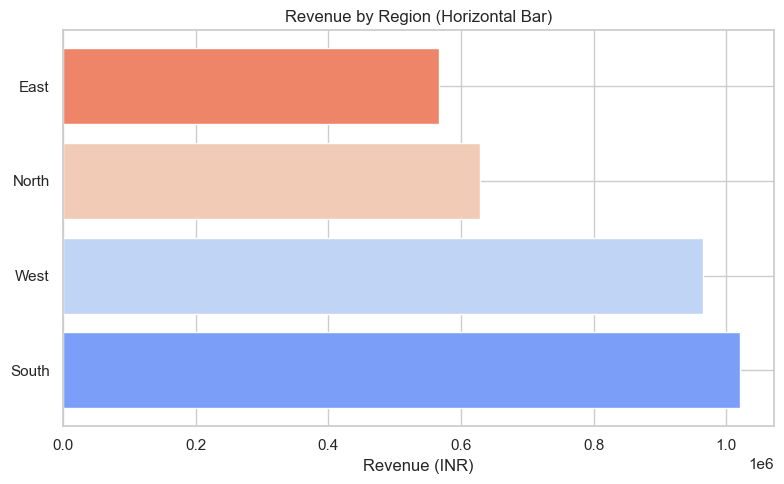

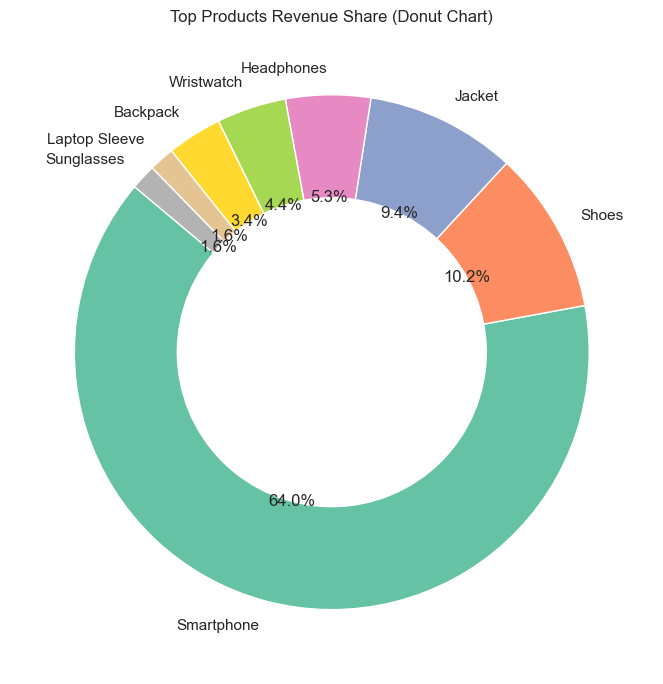

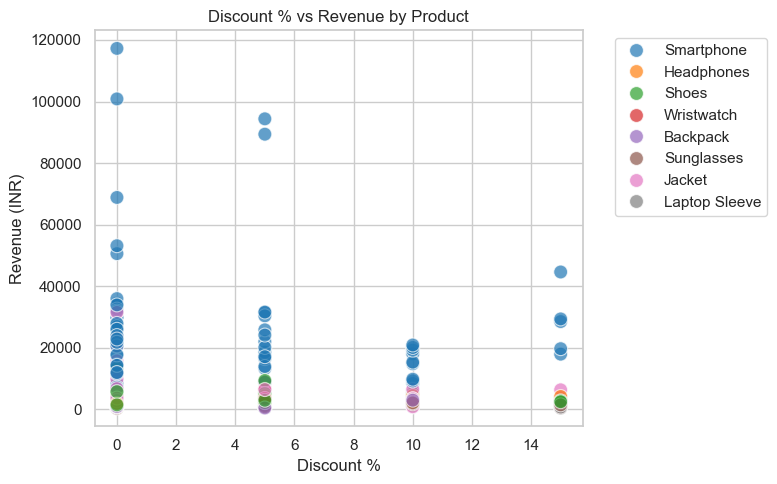

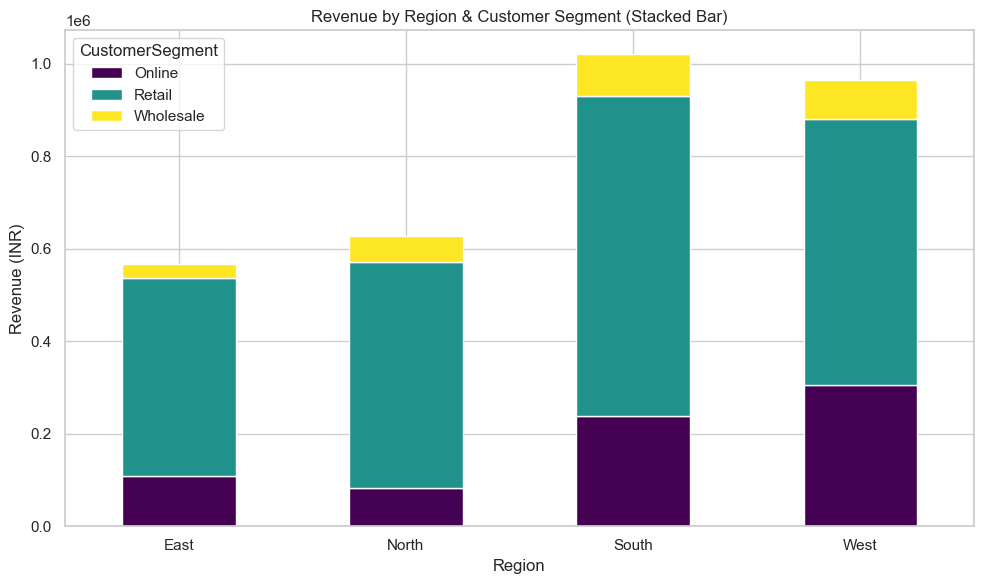

In [11]:
# ---------------- IMPORT LIBRARIES ----------------
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10,6)

# ---------------- LOAD CSV & SQL ----------------
csv_path = r'C:\Users\Suhel\OneDrive\Desktop\HTML SUHELI\fractal_sales_project\sales_data.csv'
df = pd.read_csv(csv_path)
df.columns = df.columns.str.strip()

conn = sqlite3.connect('sales_data.db')
df.to_sql('sales', conn, if_exists='replace', index=False)

# ---------------- SQL QUERIES ----------------
sales_by_region = pd.read_sql_query("""
SELECT Region, SUM(Revenue_INR) as TotalRevenue
FROM sales
GROUP BY Region
ORDER BY TotalRevenue DESC
""", conn)

top_products = pd.read_sql_query("""
SELECT Product, SUM(Revenue_INR) as TotalRevenue
FROM sales
GROUP BY Product
ORDER BY TotalRevenue DESC
LIMIT 10
""", conn)

if 'Month' in df.columns:
    monthly_sales = pd.read_sql_query("""
    SELECT Month, SUM(Revenue_INR) as TotalRevenue
    FROM sales
    GROUP BY Month
    ORDER BY Month
    """, conn)
else:
    monthly_sales = None

# ---------------- DISPLAY TABLES ----------------
display(sales_by_region)
display(top_products)
if monthly_sales is not None:
    display(monthly_sales)

# ---------------- ADVANCED PLOTS ----------------

# Revenue by Region - Horizontal Bar
plt.figure(figsize=(8,5))
colors = sns.color_palette("coolwarm", len(sales_by_region))
plt.barh(sales_by_region['Region'], sales_by_region['TotalRevenue'], color=colors)
plt.title("Revenue by Region (Horizontal Bar)")
plt.xlabel("Revenue (INR)")
plt.ylabel("")
plt.tight_layout()
plt.show()


# 2. Top Products - Donut Chart
plt.figure(figsize=(7,7))
plt.pie(top_products['TotalRevenue'], labels=top_products['Product'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2", len(top_products)))
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("Top Products Revenue Share (Donut Chart)")
plt.tight_layout()
plt.show()

# 3. Monthly Sales Trend - Area Chart
if monthly_sales is not None:
    plt.figure(figsize=(10,5))
    plt.fill_between(monthly_sales['Month'], monthly_sales['TotalRevenue'], color='skyblue', alpha=0.4)
    plt.plot(monthly_sales['Month'], monthly_sales['TotalRevenue'], marker='o', color='steelblue')
    plt.title("Monthly Revenue Trend (Area Chart)")
    plt.xlabel("Month")
    plt.ylabel("Revenue (INR)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 4. Discount Impact on Revenue - Scatter Plot
if 'DiscountPct' in df.columns:
    plt.figure(figsize=(8,5))
    sns.scatterplot(x='DiscountPct', y='Revenue_INR', hue='Product', data=df, palette='tab10', s=100, alpha=0.7)
    plt.title("Discount % vs Revenue by Product")
    plt.xlabel("Discount %")
    plt.ylabel("Revenue (INR)")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# 5. Customer Segment Revenue - Stacked Bar
if 'CustomerSegment' in df.columns:
    segment_rev = pd.read_sql_query("""
    SELECT Region, CustomerSegment, SUM(Revenue_INR) as TotalRevenue
    FROM sales
    GROUP BY Region, CustomerSegment
    """, conn)
    pivot_seg = segment_rev.pivot(index='Region', columns='CustomerSegment', values='TotalRevenue').fillna(0)
    pivot_seg.plot(kind='bar', stacked=True, colormap='viridis')
    plt.title("Revenue by Region & Customer Segment (Stacked Bar)")
    plt.ylabel("Revenue (INR)")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()
